In [2]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics

In [ ]:
#Đọc dữ liệu
train = pd.read_excel('/content/Constraint_English_Train.xlsx')
test = pd.read_excel('/content/Constraint_English_Val.xlsx')

train['text'] = train.tweet
train["text"] = train["text"].astype(str)

test['text'] = test.tweet
test["text"] = test["text"].astype(str)

def classes_def(x):
    if x ==  "real":
        return "1"
    else:
        return "0"

train['new_lb']=train['label'].apply(lambda x:classes_def(x))
test['new_lb']=test['label'].apply(lambda x:classes_def(x))

train.new_lb.value_counts(normalize= True)
test.new_lb.value_counts(normalize= True)

In [ ]:
#Một số hàm tiền xử lí dữ liệu.
#Sau thời gian thực nghiệm, nhóm cho rằng bộ dữ liệu này chỉ sử dụng hàm xóa url, link và các thẻ html cho ra kết quả có độ chính xác cao nhất.

In [4]:
#Xóa url, link và các thẻ html
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)
train['text_new']=train['text'].apply(lambda x:remove_urls(x))
test['text_new']=test['text'].apply(lambda x:remove_urls(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
train['text']=train['text_new'].apply(lambda x:remove_html(x))
test['text']=test['text_new'].apply(lambda x:remove_html(x))

In [5]:
#Chuyển các chữ in hoa thành in thường (Có thể áp dụng hoặc không)
def lower(text):
    low_text= text.lower()
    return low_text
train['text_new']=train['text'].apply(lambda x:lower(x))
test['text_new']=test['text'].apply(lambda x:lower(x))

In [ ]:
#Xóa số (Có thể áp dụng hoặc không)
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove
train['text']=train['text_new'].apply(lambda x:remove_num(x))
test['text']=test['text_new'].apply(lambda x:remove_num(x))

In [ ]:
#Xóa stopword và dấu câu (Có thể áp dụng hoặc không)
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct
train['text_new']=train['text'].apply(lambda x:punct_remove(x))
test['text_new']=test['text'].apply(lambda x:punct_remove(x))


def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
train['text']=train['text_new'].apply(lambda x:remove_stopwords(x))
test['text']=test['text_new'].apply(lambda x:remove_stopwords(x))

In [ ]:
#Xóa những đề cập và hashtag (Có thể áp dụng hoặc không)
def remove_mention(x):
    text=re.sub(r'@\w+','',x)
    return text
train['text_new']=train['text'].apply(lambda x:remove_mention(x))
test['text_new']=test['text'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text
train['text']=train['text_new'].apply(lambda x:remove_hash(x))
test['text']=test['text_new'].apply(lambda x:remove_hash(x))

#Xóa khoảng trắng còn lại
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove
train['text_new']=train['text'].apply(lambda x:remove_space(x))
test['text_new']=test['text'].apply(lambda x:remove_space(x))
test = test.drop(columns=['text_new'])
train = train.drop(columns=['text_new'])

In [6]:
train = train.drop(['id','tweet','label','text_new'], axis = 1)
test = test.drop(['id','tweet','label','text_new'], axis = 1)

In [7]:
X_train = train.iloc[:,0].values
y_train = train.iloc[:, -1].values 
X_test = test.iloc[:,0].values
y_test = test.iloc[:, -1].values

In [8]:
#Xu ly bang Count Vectorizer
count_vectorizer = CountVectorizer(binary=True)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [ ]:
#Xu ly bang TF-IDF 
vec = TfidfVectorizer(binary=True, use_idf=True)
X_train = vec.fit_transform(X_train) 
X_test = vec.transform(X_test) 

In [ ]:
#Support Vector classifier
model = SVC()

In [13]:
#Logistic Regression Classifier
model = LogisticRegression(random_state=0)

In [ ]:
#Linear SVC
model =   LinearSVC()

In [9]:
#MultinomialNB
model = MultinomialNB()

In [ ]:
#RandomForestClassifier
model = RandomForestClassifier(criterion = 'entropy', random_state = 0)

In [14]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
#Hiển thị kết quả
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, digits = 4,
                                    target_names= train['new_lb'].unique()))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1     0.9254    0.9490    0.9371      1020
           0     0.9525    0.9304    0.9413      1120

    accuracy                         0.9393      2140
   macro avg     0.9389    0.9397    0.9392      2140
weighted avg     0.9396    0.9393    0.9393      2140



Accuracy: 0.9191588785046729


Text(25.5, 0.5, 'True Value')

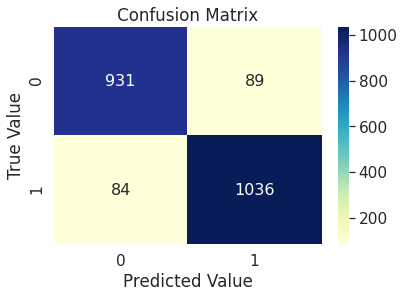

In [12]:
cm=confusion_matrix(y_test, y_pred)
cm_df=pd.DataFrame(cm,index=[0,1],columns=[0,1])
print("Accuracy:",accuracy_score(y_test, y_pred))

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")